# Notebook 5A:  Newton's Gradient Descent Method

Author: Christopher Monterola

Copyright © 2021 Christopher Monterola. All rights reserved.

This notebook is being written as part of a book on Deep Learning. None of the content here shall be reproduced and/or distributed without the written permission of the author. 

---

## Executive Summary

Optimization cuts across many fields and is one of the most common analytics problems encountered in the real-world: industries, governments, and other organizations/stakeholders. Optimization, loosely defined, is when you look for the optimal, i.e., maximum or minimum, solution to a given problem or system. For example, to decongest a train system, you may try to optimize the number of trains deployed considering, of course, the cost. Many other examples used for various functions [can be sourced here](https://www.solver.com/examples-optimization-problems), they include applications in corporate finance, investments, production, distribution, and purchasing to human resources.

Optimization is arguably the most critical concept in engineering and the natural sciences. For example, one can demonstrate concepts such as a particle's trajectory (derivable using Newton's Laws of Motion) or that even the trajectory of light (say, refraction) are mere consequences of minimizing the travel time of light (or the particle) as it moves through a given medium. In biology, protein folding, or the structure formed by the reconfiguration of amino acids, is a consequence of minimizing the energy associated with the interaction of amino acids. Humans walk or run while kangaroos hop because it is the most energy-efficient motion for their body structure.

In management, innovation, and governance, we now talk of the triple bottom line in ensuring sustainability. The idea is to optimize the combination of **Profit**, **Planet**, and **Profitability**.

Keeping in mind that, in the grand scheme of things, something is conserved, minimized, or maximized improves one's intuition on how to accurately understand a system and its mechanisms as exhibited or revealed in the data coming from the system. Note that a mechanism-based understanding of a system allows one to go beyond predictive analytics. It also enables you to control a system's dynamics by tuning, for example, specific parameters in the system, which allows you to explore "what-if" scenarios.

This notebook aims to provide a general introduction to the most basic methodology in optimization known as Newton's gradient-descent method (GDM). GDM is at the core of most learning algorithms, including artificial neural networks (e.g., convolutional NN, recurrent NN, etc.) described in succeeding lectures. 

Lessons that can be learned in this notebook:

1. Understand the basic principles of optimization.
2. Revisit the conceptual meaning of derivatives.
3. Implement gradient descent method.

*Note: The scripts, for this series, have been made to be verbose to make the discussions easier to follow.*

This notebook is part of a *lecture trilogy* to deeply dive in the concept of backpropagation learning method in Neural Networks. Following closely this lecture are:

**Notebook 5B:** On Backpropagation Method 
    
**Notebook 5C:** Multiple outputs NN and general notes on tuning NN parameters

---


In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


# 1. Derivatives in mathematical optimization

Here, we demonstrate two ways of optimizing a system. One includes a "brute force" search while the other uses calculus via derivatives.



## Example 1. A square is an optimised rectangle.

If you were given a wire and asked to form a rectangle with perimeter $P$ such that you will also produce the maximum enclosed area $A$, what is the best ratio of your length $l$ and width $w$? 

The answer is a square with $l=w=P/4$.

Let's solve this problem using two approaches, both equally acceptable. One is based on crunching all possible combinations and the other is based on calculus. 

We start by identifying the cost function of the problem which is $A = l w$.

**Solution 1.** *Numerical Simulation*. We can cast the problem by finding all  possible ranges of $l$ and $w$ that will maximize $A$ noting that $P= 2l + 2w$. Without loss of generality, we can assume that $P=4$. We then run simulations for $l$ from 0 to 2 (maximum possible length is 2) where $l$ is related to $w$ by $2l + 2w = P =4$. Hence, $w$ is constrained to be $w=2-l$. Shown below is the resulting area for every combination of $l$ and $w$.

In [ ]:
# Run length from 0 to 2
del_length = 0.1 # increment of length
max_length = 2
length = 0 # initial length

width = lambda length: 2 - length

while length < max_length:
    prev_length = length
    Area = length*width(prev_length)
    print('length=%.2f' %length,'width=%.2f' %width(prev_length), 'area=%.2f' %Area)
    #print("width = %f " % width(prev_length))
    length += del_length

length=0.00 width=2.00 area=0.00
length=0.10 width=1.90 area=0.19
length=0.20 width=1.80 area=0.36
length=0.30 width=1.70 area=0.51
length=0.40 width=1.60 area=0.64
length=0.50 width=1.50 area=0.75
length=0.60 width=1.40 area=0.84
length=0.70 width=1.30 area=0.91
length=0.80 width=1.20 area=0.96
length=0.90 width=1.10 area=0.99
length=1.00 width=1.00 area=1.00
length=1.10 width=0.90 area=0.99
length=1.20 width=0.80 area=0.96
length=1.30 width=0.70 area=0.91
length=1.40 width=0.60 area=0.84
length=1.50 width=0.50 area=0.75
length=1.60 width=0.40 area=0.64
length=1.70 width=0.30 area=0.51
length=1.80 width=0.20 area=0.36
length=1.90 width=0.10 area=0.19


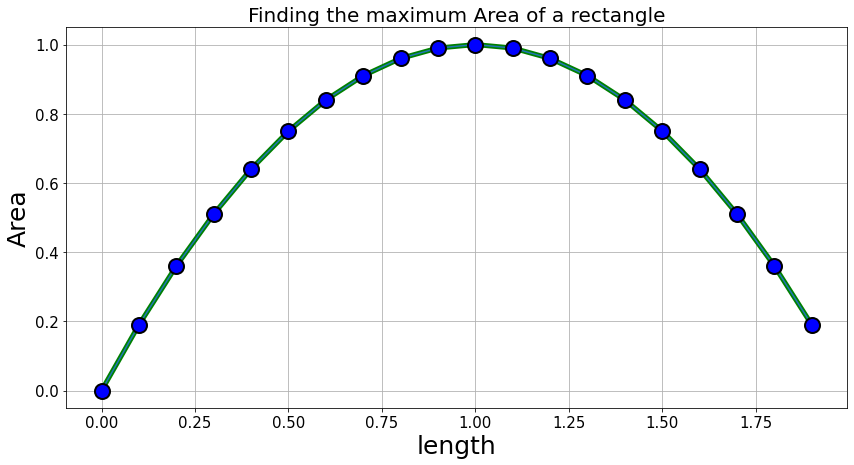

In [ ]:
#Plot area vs length

def Area(length, width):
    return length*width

length = np.arange(0, 2., 0.1)
width = lambda length: 2 - length

main_canvas = plt.figure(figsize = (14, 7))
plot_canvas = plt.subplot(1, 1, 1)
plot_canvas.plot(length, Area(length, width(length)), 'g-', lw = 5)
plot_canvas.plot(length, Area(length, width(length)), marker = 'o', ms = 15, mew = 2, mfc = 'blue', mec = 'black')

plot_canvas.grid(True)
plot_canvas.set_title('Finding the maximum Area of a rectangle', size = 20)
plot_canvas.set_xlabel(r'length', size = 25)
plot_canvas.set_ylabel(r'Area', size = 25)
plot_canvas.tick_params(axis = 'both', which = 'both', labelsize = 15)

The above results clearly indicate that the ratio to get the maximum area is for `length:width = 1:1`, or a square.

**Solution 2**. *Calculus-Based Solution.* Using calculus, the solution is more straightforward and general. Again, we start by noting that the cost function to be maximized is the area $A=l w$; by imposing the constraint for $w= \frac{P-2l}{2} $ with $P= constant$, the cost function is now:

\begin{equation}
A=l\frac{P-2l}{2}= \frac{Pl}{2} - l^2
\end{equation}

Equating the derivative of $A$ with respect to $l$ to zero will yield:

\begin{equation}
\frac{dA}{dl} =\frac{P}{2} - 2 l =0.
\end{equation}

Hence, $l=P/4$ and $w =\frac{P-2l}{2}= P/4$. Therefore, the maximum area for a rectangle with perimeter P is $P^2/16$ and the ratio of $l:w$ is $l=w$ or 1:1. Note that $\frac{d^2A}{dl^2} = -2 <0$, indicative that the optimal relation produced a maximum area $A$.





### For Discussion: Discuss the limitations and advantages of using **Solution 1** as compared to **Solution 2**.

# 2. Newton's Gradient-Descent Method

At the heart of most optimization methods is a very simple mathematical algorithm known as the gradient-descent method or GDM. Recall that if you want to find the minimum $x$-value (or $x_{\text{min}}$) of $f(x)$, you just need to find the values of $x_{\text{min}}$ for which $f'(x_{\text{min}})=0$. The minimum value is guaranteed if $f''(x_{\text{min}})>0$. 

GDM will allow this search by iterating through $x$ using the following rule:

\begin{equation}
x_{n+1}=x_{n} - \gamma f'(x_{n})
\end{equation}

where $x_{n}$ is the x-value after the $n$th iteration and $\gamma$ is a tuning parameter that indicates how "aggressive" you want to speed up the search for the optimal value of $f(x)$. Too large value of $\gamma$ can result to non-convergence of the system while too low might result to a very slow convergence as you will verify in the exercises. (Non-convergence is when the numerical value of the parameter we are searching for blows up.)

The mathematics behind GDM is quite intuitive. If you want to find the minimum point of a given terrain and you don't have the entire view of the terrain (limited visibility), just follow this simple rule: *go down the steepest slope every iteration until the slope is near zero*. You can think of $\gamma$ as the distance between two rungs of a ladder you will be using every step of the way. For a distance between rungs that is too narrow, you would need to take so many steps (or iterations) to find the minimum/minima; on the other hand, with a very wide gap between rungs, you might keep on missing the local minima for terrains with dips (steep depressions).




## Example 2. Use Newton's Gradient Descent to find the optimal values of $f(x) = 2x^3 -9x^2$

As an example, consider the function $f(x) = 2x^3 -9x^2$. The local maximum and minimum of $f(x)$ can be easily computed by hand at $x=0,3$, respectively. Let's plot the graph of this function.

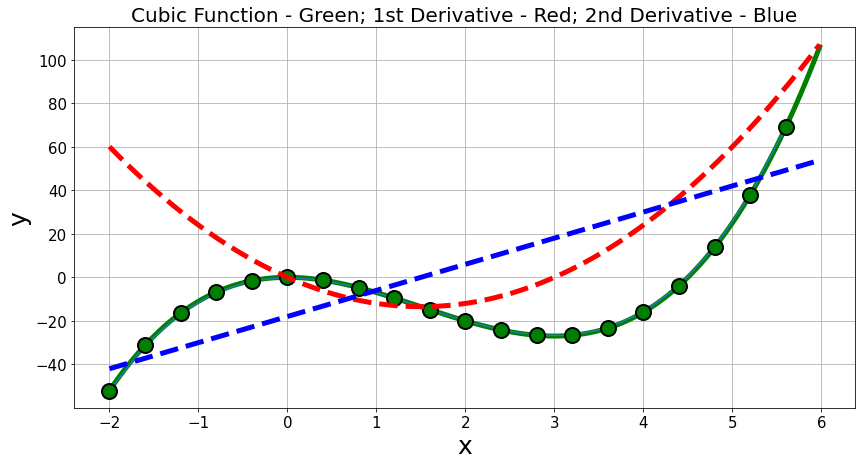

In [ ]:
def cubic_function(x, a, b, c, d):
    return (a*x**3) + (b*x**2) + (c*x) + d

def cubic_function_derivative(x, a, b, c, d):
    return (3*a*x**2) + (2*b*x) + (c)

def cubic_function_derivative2(x, a, b, c, d):
    return (6*a*x) + (2*b)


a = 2
b = -9
c = 0
d = 0

x1 = np.arange(-2, 6., 0.4)
x2 = np.arange(-2,6., 0.02)

main_canvas = plt.figure(figsize = (14, 7))
plot_canvas = plt.subplot(1, 1, 1)
plot_canvas.plot(x2, cubic_function(x2, a, b, c, d), 'g-', lw = 5)
plot_canvas.plot(x1, cubic_function(x1, a, b, c, d), marker = 'o', ms = 15, mew = 2, mfc = "green", mec = "black")

plot_canvas.plot(x2, cubic_function_derivative(x2, a, b, c, d), 'r--', lw = 5)
#plot_canvas.plot(x1, cubic_function_derivative(x1, a, b, c, d), marker = 'o', ms = 15, mew = 2, mfc = "blue", mec = "black")
plot_canvas.plot(x2, cubic_function_derivative2(x2, a, b, c, d), 'b--', lw = 5)

plot_canvas.grid(True)
plot_canvas.set_title("Cubic Function - Green; 1st Derivative - Red; 2nd Derivative - Blue", size = 20)
plot_canvas.set_xlabel(r"x", size = 25)
plot_canvas.set_ylabel(r"y", size = 25)
plot_canvas.tick_params(axis = "both", which = "both", labelsize = 15)

### Implementing GDM to find the optimal points

Now, using GDM we can iteratively search these points by noting that $f'(x)= 6x^2-18x$, and thus iterate using:

\begin{equation}
x_{n+1}=x_{n} - \gamma f'(x_{n})=x_{n} - \gamma (6x_{n}^2-18x_{n}).
\end{equation}

The cell below provides an illustration of the convergence of the search algorithm. 

In [3]:
# From calculation, it is expected that the local minimum occurs at x=0,3

cur_x = 4 # The algorithm starts at x0=6
gamma = .01 # step size multiplier
precision = 0.001 #difference between current and previous estimates, a stopping rule of sort
previous_step_size = 1/precision; # some large value
iteration=0
df = lambda x: 6 * x**2 - 18 * x #derivative of f(x)

while previous_step_size > precision:
    prev_x = cur_x
    print('Estimate at %f' % prev_x)
    cur_x += -gamma * df(prev_x)
    previous_step_size = abs(cur_x - prev_x)
    iteration +=1

print('The local minimum occurs at %f' % cur_x)
print('Total iteration=', iteration)

Estimate at 4.000000
Estimate at 3.760000
Estimate at 3.588544
Estimate at 3.461823
Estimate at 3.365898
Estimate at 3.292004
Estimate at 3.234327
Estimate at 3.188854
Estimate at 3.152720
Estimate at 3.123831
Estimate at 3.100621
Estimate at 3.081902
Estimate at 3.066757
Estimate at 3.054473
Estimate at 3.044490
Estimate at 3.036363
Estimate at 3.029739
Estimate at 3.024333
Estimate at 3.019917
Estimate at 3.016308
Estimate at 3.013357
Estimate at 3.010942
Estimate at 3.008965
Estimate at 3.007347
Estimate at 3.006021
Estimate at 3.004935
The local minimum occurs at 3.004045
Total iteration= 26


**Exercise 1:** Observe the dependence of convergence with the choice of starting approximation, say start with x = 5, 2, 1, 0.1, -.1. 



In [10]:
# From calculation, it is expected that the local minimum occurs at x=0,3

cur_x = 1 # The algorithm starts at x0=6
gamma = .01 # step size multiplier
precision = 0.001 #difference between current and previous estimates, a stopping rule of sort
previous_step_size = 1/precision; # some large value
iteration=0
df = lambda x: 6 * x**2 - 18 * x #derivative of f(x)

while previous_step_size > precision:
    prev_x = cur_x
    print('Estimate at %f' % prev_x)
    cur_x += -gamma * df(prev_x)
    previous_step_size = abs(cur_x - prev_x)
    iteration +=1

print('The local minimum occurs at %f' % cur_x)
print('Total iteration=', iteration)

Estimate at 1.000000
Estimate at 1.120000
Estimate at 1.246336
Estimate at 1.377475
Estimate at 1.511575
Estimate at 1.646566
Estimate at 1.780278
Estimate at 1.910564
Estimate at 2.035450
Estimate at 2.153248
Estimate at 2.262644
Estimate at 2.362747
Estimate at 2.453087
Estimate at 2.533584
Estimate at 2.604486
Estimate at 2.666293
Estimate at 2.719679
Estimate at 2.765422
Estimate at 2.804344
Estimate at 2.837265
Estimate at 2.864969
Estimate at 2.888180
Estimate at 2.907558
Estimate at 2.923684
Estimate at 2.937072
Estimate at 2.948161
Estimate at 2.957331
Estimate at 2.964902
Estimate at 2.971146
Estimate at 2.976290
Estimate at 2.980524
Estimate at 2.984007
Estimate at 2.986870
Estimate at 2.989223
Estimate at 2.991156
Estimate at 2.992743
Estimate at 2.994046
Estimate at 2.995116
The local minimum occurs at 2.995994
Total iteration= 38


-----

**Exercise 2:** Observe the dependence of convergence with the choice of $\gamma$, discuss with your LT mates.

In [15]:
# From calculation, it is expected that the local minimum occurs at x=0,3

cur_x = 4 # The algorithm starts at x0=6
gamma = .07 # step size multiplier
precision = 0.001 #difference between current and previous estimates, a stopping rule of sort
previous_step_size = 1/precision; # some large value
iteration=0
df = lambda x: 6 * x**2 - 18 * x #derivative of f(x)

while previous_step_size > precision:
    prev_x = cur_x
    print('Estimate at %f' % prev_x)
    cur_x += -gamma * df(prev_x)
    previous_step_size = abs(cur_x - prev_x)
    iteration +=1

print('The local minimum occurs at %f' % cur_x)
print('Total iteration=', iteration)

Estimate at 4.000000
Estimate at 2.320000
Estimate at 2.982592
Estimate at 3.004399
Estimate at 2.998848
Estimate at 3.000299
The local minimum occurs at 2.999922
Total iteration= 6


In [17]:
# Generating  Error [gamma][iteration]

cur_x = 5 # The algorithm starts at x0=5
total_iteration = 10
gamma = np.zeros(5)
error = np.zeros((5,total_iteration))
gamma = [0.01, .03, .05, .06, .08] # step size multiplier
precision = 0.000001 #difference between current and previous estimates, a stopping rule of sort
iteration=0

df = lambda x: 6 * x**2 - 18 * x #derivative of f(x)

for i in range(0,5,1):
    cur_x=5
    for iteration in range(0,total_iteration, 1):
        prev_x = cur_x
        cur_x += -gamma[i] * df(prev_x)
        error[i][iteration] = abs(3.0 - prev_x)
        print("id %d" % i,"iteration %f" % error[i][iteration])
        


id 0 iteration 2.000000
id 0 iteration 1.400000
id 0 iteration 1.030400
id 0 iteration 0.781225
id 0 iteration 0.603985
id 0 iteration 0.473380
id 0 iteration 0.374726
id 0 iteration 0.298850
id 0 iteration 0.239699
id 0 iteration 0.193106
id 1 iteration 2.000000
id 1 iteration 0.200000
id 1 iteration 0.084800
id 1 iteration 0.037714
id 1 iteration 0.017092
id 1 iteration 0.007810
id 1 iteration 0.003582
id 1 iteration 0.001645
id 1 iteration 0.000756
id 1 iteration 0.000348
id 2 iteration 2.000000
id 2 iteration 1.000000
id 2 iteration 0.400000
id 2 iteration 0.088000
id 2 iteration 0.011123
id 2 iteration 0.001149
id 2 iteration 0.000115
id 2 iteration 0.000012
id 2 iteration 0.000001
id 2 iteration 0.000000
id 3 iteration 2.000000
id 3 iteration 1.600000
id 3 iteration 0.793600
id 3 iteration 0.163240
id 3 iteration 0.003466
id 3 iteration 0.000282
id 3 iteration 0.000023
id 3 iteration 0.000002
id 3 iteration 0.000000
id 3 iteration 0.000000
id 4 iteration 2.000000
id 4 iteration 2

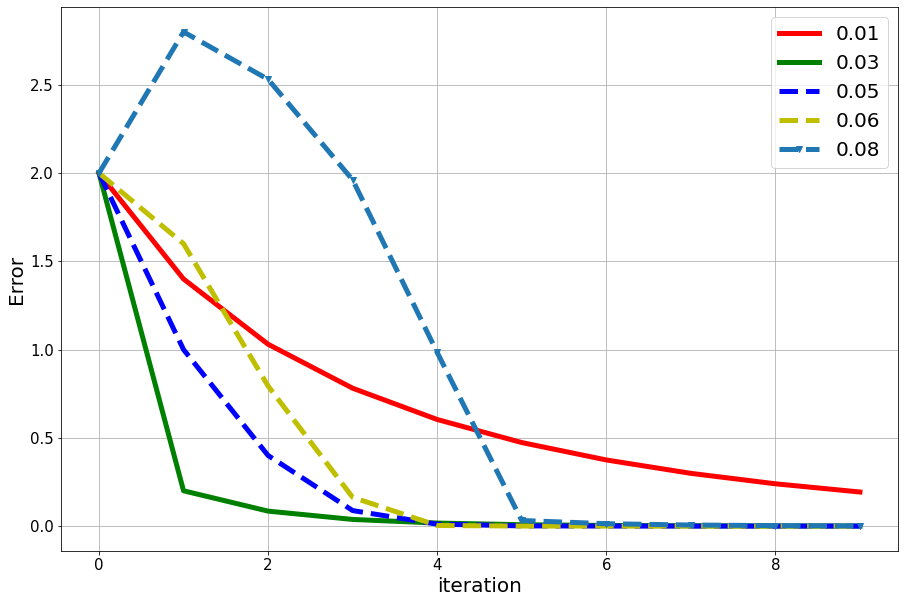

In [18]:
iter = np.arange(0, total_iteration, 1)

main_canvas = plt.figure(figsize = (15, 10))
plot_canvas = plt.subplot(1, 1, 1)

'''
plot_canvas.plot(iter, error[0], 'r-', lw = 5, label= gamma[0])
plot_canvas.plot(iter, error[1], 'g-', lw = 5, label=gamma[1])
#plot_canvas.plot(iter, error[1], marker = 'o', ms = 15, mew = 2, mfc = "blue", mec = "black")

plot_canvas.plot(iter, error[2], 'b--', lw = 5, label=gamma[2])
plot_canvas.plot(iter, error[3], 'y--', lw = 5, label=gamma[3])
plot_canvas.plot(iter, error[4], 'v--', lw = 5, label=gamma[4])
#plot_canvas.plot(x1, cubic_function_derivative(x1, a, b, c, d), marker = 'o', ms = 15, mew = 2, mfc = "blue", mec = "black")
'''

attrib = ['r-', 'g-', 'b--', 'y--', 'v--']
for i in range(5):
    plot_canvas.plot(iter, error[i], attrib[i], lw = 5, label=gamma[i])
    
plot_canvas.grid(True)
#plot_canvas.set_title("ERROR PLOT", size = 20)
plot_canvas.set_xlabel(r'iteration', size = 20)
plot_canvas.set_ylabel(r'Error', size = 20)
plot_canvas.tick_params(axis = 'both', which = 'both', labelsize = 15)
plt.legend(fontsize=20);


## Example 3. Suppose your goal is to compute the solution to $f(x) = 2x^3 -9x^2=0$. How would you reformulate it?

Solution 1: minimize $G(x) = \frac{1}{2} (2x^3 -9x^2)^2$ and since it is a positive definite function ($G(x) \ge 0$) then you know that $G(x)=0$ is a minimum. Following GDM, 

\begin{equation}
x_{n+1}=x_{n} - \gamma G'(x_{n})
\end{equation}

with $G'(x) = (2x^3 -9x^2$)*$(6x^2-18x)$. Let's implement! Look for local minima traps and divergence!

In [ ]:
cur_x = 6 # The algorithm starts at x0=6
gamma = .0001 # step size multiplier
precision = 0.0001 #difference between current and previous estimates, a stopping rule of sort
previous_step_size = 1/precision; # some large value
iteration=0

df = lambda x: (2*x**3-9*x**2)*(6*x*x -18*x) #derivative of G(x)

while previous_step_size > precision:
    prev_x = cur_x
    print('Estimate at %f' % prev_x)
    cur_x += -gamma * df(prev_x)
    previous_step_size = abs(cur_x - prev_x)
    iteration +=1

print('The local minimum occurs at %f' % cur_x)
print('Total iteration=', iteration)

Estimate at 6.000000
Estimate at 4.833600
Estimate at 4.750706
Estimate at 4.694234
Estimate at 4.653386
Estimate at 4.622720
Estimate at 4.599114
Estimate at 4.580612
Estimate at 4.565917
Estimate at 4.554126
Estimate at 4.544592
Estimate at 4.536834
Estimate at 4.530491
Estimate at 4.525283
Estimate at 4.520995
Estimate at 4.517454
Estimate at 4.514524
Estimate at 4.512095
Estimate at 4.510079
Estimate at 4.508404
Estimate at 4.507010
Estimate at 4.505849
Estimate at 4.504882
Estimate at 4.504076
Estimate at 4.503404
Estimate at 4.502843
Estimate at 4.502375
Estimate at 4.501984
Estimate at 4.501658
Estimate at 4.501385
Estimate at 4.501158
Estimate at 4.500968
Estimate at 4.500809
Estimate at 4.500676
Estimate at 4.500565
The local minimum occurs at 4.500472
Total iteration= 35



---
## Example 4. Consider the relation $f(x) = x^2=64$. Find the value of x. What is the function $G(x)$ to be minimized?


In [ ]:
cur_x = 10 # The algorithm starts at x0=6
gamma = .001 # step size multiplier
precision = 0.0001 #difference between current and previous estimates, a stopping rule of sort
previous_step_size = 1/precision; # some large value
iteration=0
df = lambda x:  (x**2 -64)*2*x

while previous_step_size > precision:
    prev_x = cur_x
    print('Estimate at %f' % prev_x)
    cur_x += -gamma * df(prev_x)
    previous_step_size = abs(cur_x - prev_x)
    iteration +=1

print('The local minimum occurs at %f' % cur_x)
print('Total iteration=', iteration)

Estimate at 10.000000
Estimate at 9.280000
Estimate at 8.869482
Estimate at 8.609292
Estimate at 8.435042
Estimate at 8.314422
Estimate at 8.229122
Estimate at 8.167923
Estimate at 8.123572
Estimate at 8.091201
Estimate at 8.067453
Estimate at 8.049966
Estimate at 8.037054
Estimate at 8.027502
Estimate at 8.020425
Estimate at 8.015177
Estimate at 8.011280
Estimate at 8.008386
Estimate at 8.006236
Estimate at 8.004638
Estimate at 8.003449
Estimate at 8.002566
Estimate at 8.001909
Estimate at 8.001420
Estimate at 8.001056
Estimate at 8.000786
Estimate at 8.000585
Estimate at 8.000435
Estimate at 8.000324
The local minimum occurs at 8.000241
Total iteration= 29


In [ ]:
cur_x = 7 # The algorithm starts at x0=6
gamma = .001 # step size multiplier
precision = 0.0001 #difference between current and previous estimates, a stopping rule of sort
previous_step_size = 1/precision; # some large value
iteration=0
df = lambda x: (x**2 - 64)*2*x

while previous_step_size > precision:
    prev_x = cur_x
    print('Estimate at %f' % prev_x)
    cur_x += -gamma * df(prev_x)
    previous_step_size = abs(cur_x - prev_x)
    iteration +=1

print('The local minimum occurs at %f' % cur_x)
print('Total iteration=', iteration)

Estimate at 7.000000
Estimate at 7.210000
Estimate at 7.383269
Estimate at 7.523364
Estimate at 7.634695
Estimate at 7.721905
Estimate at 7.789428
Estimate at 7.841225
Estimate at 7.880669
Estimate at 7.910538
Estimate at 7.933057
Estimate at 7.949980
Estimate at 7.962665
Estimate at 7.972156
Estimate at 7.979247
Estimate at 7.984539
Estimate at 7.988486
Estimate at 7.991427
Estimate at 7.993618
Estimate at 7.995250
Estimate at 7.996465
Estimate at 7.997369
Estimate at 7.998042
Estimate at 7.998543
Estimate at 7.998916
Estimate at 7.999194
Estimate at 7.999400
Estimate at 7.999554
Estimate at 7.999668
The local minimum occurs at 7.999753
Total iteration= 29


#3. Newton's Gradient-Descent Method in 2D,  3D, or more dimensions

In general, we can have more than one dependent variable and solve simultaneous equations using the GDM. 



## Example 5. Consider, for example, three equations parametrized by $x$, $y$, and $z$ given by:

\begin{equation}
f(x,y,z)=0 
\end{equation}

\begin{equation}
g(x,y,z)=0
\end{equation}

\begin{equation}
h(x,y,z)=0
\end{equation}

The problem in this case can be written as a minimization of $G$ which takes the form:

\begin{equation}
G= \frac{f^2 + g^2 + h^2}{2} 
\end{equation}

This is a quadratic minimization representation; it assures that when you minimize $G$, you minimize independently $f$, $g$, and $h$. The expression for GDM can then be generalized as:

\begin{equation}
\bf{x_{n+1}}=x_{n} - \gamma \nabla G(x_{n})
\end{equation}

where the vector $\bf{x}$ =${x, y, z}$ and the gradient $\nabla G(x_{n})$ is given by:

\begin{equation}
\nabla G(\bf{x_{n}})=\frac{\partial G}{\partial x_n} 
\end{equation}

To illustrate, consider solving simultaneously the equations:


\begin{equation}
f(x,y)= x^2 +y^2 -20 =0
\end{equation}

and

\begin{equation}
g(x,y)= y - 2x =0.
\end{equation}

Note that we are looking for the intersection of a circle and a line; solving the equations simultaneously will yield the points (2,4) and (-2, -4) as the solution. 


In [43]:
# From calculation, it is expected that the solution is at (2, 4) and (-2, -4)

cur_x = 1 # The algorithm starts at x0=6
cur_y= 0
gamma = 0.07555 # step size multiplier
precision = 0.000001 #difference between current and previous estimates, a stopping rule of sort
error = 1/precision; # some large value

gradG_x=0
gradG_y=0

iteration=0

def f(x, y):
    return (x**2) + (y**2) -20
def g(x, y):
    return y-2*x
def df_x(x,y):
    return 2*x
def df_y(x,y):
    return 2*y
def dg_x(x, y):
    return -2
def dg_y(x, y):
    return 1


while error > precision:
    
    prev_x = cur_x 
    prev_y = cur_y
    print("iter=%d" %iteration, " est. x=%.2f" % cur_x," est. y=%.2f" % cur_y , "error=%.4f" % error)
    gradG_x=(f(prev_x,prev_y)*df_x(prev_x,prev_y))+(g(prev_x,prev_y)*dg_x(prev_x,prev_y))
    gradG_y=(f(prev_x,prev_y)*df_y(prev_x,prev_y))+(g(prev_x,prev_y)*dg_y(prev_x,prev_y))
    cur_x += gamma *gradG_x
    cur_y += gamma *gradG_y
    error = abs(f(cur_x,cur_y)) + abs(g(cur_x,cur_y))
    iteration +=1

print('The local minimum occurs at x= %f' % cur_x, 'y=%f' %cur_y)
print('Total iteration=', iteration)

iter=0  est. x=1.00  est. y=0.00 error=1000000.0000
iter=1  est. x=-1.57  est. y=-0.15 error=20.5026
iter=2  est. x=2.13  est. y=0.47 error=19.0191
iter=3  est. x=-2.20  est. y=-0.90 error=17.8362
iter=4  est. x=2.04  est. y=1.32 error=16.8647
iter=5  est. x=-1.89  est. y=-1.70 error=15.6193
iter=6  est. x=1.66  est. y=1.93 error=14.8827
iter=7  est. x=-1.52  est. y=-2.12 error=14.1443
iter=8  est. x=1.38  est. y=2.18 error=13.9204
iter=9  est. x=-1.31  est. y=-2.26 error=13.5243
iter=10  est. x=1.24  est. y=2.26 error=13.5557
iter=11  est. x=-1.23  est. y=-2.31 error=13.2846
iter=12  est. x=1.19  est. y=2.29 error=13.4237
iter=13  est. x=-1.19  est. y=-2.33 error=13.1880
iter=14  est. x=1.17  est. y=2.30 error=13.3793
iter=15  est. x=-1.18  est. y=-2.34 error=13.1450
iter=16  est. x=1.16  est. y=2.30 error=13.3686
iter=17  est. x=-1.18  est. y=-2.35 error=13.1220
iter=18  est. x=1.15  est. y=2.30 error=13.3713
iter=19  est. x=-1.18  est. y=-2.35 error=13.1062
iter=20  est. x=1.15  est

KeyboardInterrupt: 

**Exercise 3:** Start with $(x_0, y_0) = (1, 0)$ find the  $\gamma$  that will yield the fastest convergence to the solution for an absolute error less than .001.

# End.